In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [2]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.isna().sum(axis = 'rows')/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [4]:
df.drop(['Cabin'], inplace = True, axis = 'columns')

In [5]:
df = df[df.Age.notna()]

In [6]:
vars_disc = ['Survived', 'Pclass','Sex','SibSp', 'Perch', 'Embarked']
vars_cat =  ['Pclass','Sex','Embarked']

#one hot encoding
for category in vars_cat:
    dummies = pd.get_dummies(df[category], prefix = category)
    df= pd.concat([df,dummies], axis='columns')
    df.drop([category],axis='columns', inplace = True)


,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,0,1,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,0,1,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,1,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,"Rice, Mrs. William (Margaret Norton)",39.0,0,5,382652,29.1250,0,0,1,1,0,0,1,0
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,0,1,0,0,1,0,0,1
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,1,0,0,1,0,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,1,0,0,0,1,1,0,0


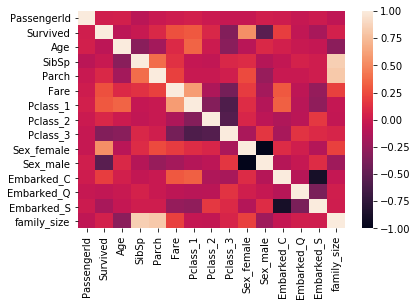

In [9]:
df['family_size'] = df['SibSp'] + df['Parch']
corr = df.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns)

In [25]:
#####
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import joblib



In [16]:
df = pd.read_csv('titanic-master-table.csv')
df.columns

Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Name', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'is-Pclass-1', 'is-Pclass-2', 'is-Sex-male',
       'is-Embarked-S', 'is-Embarked-C', 'family_size'],
      dtype='object')

In [18]:
y = df['Survived']
X = df[['Age', 'SibSp', 'Parch','Fare','is-Pclass-1', 'is-Pclass-2', 'is-Sex-male',
       'is-Embarked-S', 'is-Embarked-C', 'family_size']]


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15, random_state = 1)

In [22]:
clf = [
    (LogisticRegression(), 'log-reg'),
    (DecisionTreeClassifier(), 'clf-tree'),
]

In [27]:
for model,name in clf:
    #Train
    model.fit(X_train,y_train)
    
    #Measure
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    print(f'name: {name}')
    print(f'Result: {round(accuracy*100,2)}')
    
    #Save
    job_file = f'model-{name}.pkl'
    joblib.dump(model,job_file)

name: log-reg
Result: 79.35
name: clf-tree
Result: 70.65


/home/eduardoubuntu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
